In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.insert(1, os.path.join(sys.path[0], '..'))

import slab_with_hole_fenics as sfenics
import slab_with_hole_varmintfem as svarmintfem
import slab_with_hole_varmintiga as svarmintiga

import matplotlib.pyplot as plt

import numpy as np
import time

import fenics as fe
from varmintv2.utils.movie_utils import plot_ctrl

In [2]:
mesh_resolutions = [15, 30, 45, 60, 75, 90]
patch_ncps = [5, 10, 13, 18, 22, 25, 30, 35, 40]

def get_vfem(mesh_resolution):
    (ref_ctrl, def_ctrl, element, cell, ndof), stress_at, deformation_at, ref_at = svarmintfem.solve_slab_with_hole(mesh_resolution)

    return {
        'ref_ctrl': ref_ctrl,
        'def_ctrl': def_ctrl,
        'element': element,
        'cell': cell,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
        'ndof': ndof,
    }

def get_viga(patch_ncp):
    (ref_ctrl, def_ctrl, element, cell, ndof), stress_at, deformation_at, ref_at = svarmintiga.solve_slab_with_hole(3, patch_ncp)

    return {
        'ref_ctrl': ref_ctrl,
        'def_ctrl': def_ctrl,
        'element': element,
        'cell': cell,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
        'ndof': ndof,
    }

def get_fenics(mesh_resolution):
    (u, A, L, ndof), stress_at, deformation_at, ref_at = sfenics.solve_slab_with_hole(mesh_resolution)
    
    return {
        'u': u,
        'A': A,
        'L': L,
        'stress_at': stress_at,
        'deformation_at': deformation_at,
        'ref_at': ref_at,
        'ndof': ndof,
    }

In [3]:
# Solve for all mesh resolutions and patch_ncps
fenics_results = {}
vfem_results = {}
for mesh_resolution in mesh_resolutions:
    print(f'fenics {mesh_resolution}')
    fenics_results[mesh_resolution] = get_fenics(mesh_resolution)

    print(f'varmint fem {mesh_resolution}')
    vfem_results[mesh_resolution] = get_vfem(mesh_resolution)

viga_results = {}
for patch_ncp in patch_ncps:
    print(f'varmint iga {patch_ncp}')
    viga_results[patch_ncp] = get_viga(patch_ncp)

fenics 15
varmint fem 15
Finding constraints.


	Done.
556 global degrees of freedom.
Starting optimization.
Optimization succeeded
Took 5.943621635437012 seconds.
fenics 30
varmint fem 30
Finding constraints.
	Done.
2114 global degrees of freedom.
Starting optimization.
Optimization succeeded
Took 6.274150371551514 seconds.
fenics 45
varmint fem 45
Finding constraints.
	Done.
4900 global degrees of freedom.
Starting optimization.
Reached max iters. Ended up with norm 1.4394301408815934e-08
Optimization reached max iters.
Took 9.102988481521606 seconds.
fenics 60
varmint fem 60
Finding constraints.
	Done.
8454 global degrees of freedom.
Starting optimization.
Reached max iters. Ended up with norm 1.9367515615693654e-08
Optimization reached max iters.
Took 12.212966442108154 seconds.
fenics 75
varmint fem 75
Finding constraints.
	Done.
13232 global degrees of freedom.
Starting optimization.
Reached max iters. Ended up with norm 2.4249056970930586e-08
Optimization reached max iters.
Took 18.172963619232178 seconds.
fenics 90
varmint f

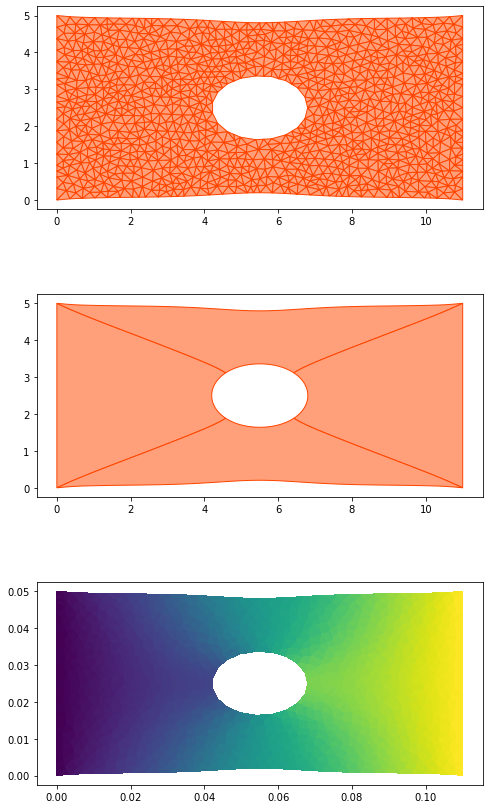

In [4]:
fig, ax = plt.subplots(3, 1)
fig.set_size_inches(8, 15)

ax[0].set_aspect('equal')
plot_ctrl(ax[0], vfem_results[30]['element'], vfem_results[30]['def_ctrl'])

ax[1].set_aspect('equal')
plot_ctrl(ax[1], viga_results[30]['element'], viga_results[30]['def_ctrl'])

ax[2].set_aspect('equal')
plt.sca(ax[2])
fe.plot(fenics_results[30]['u'], mode='displacement')

# Compare deformations at various points on domain

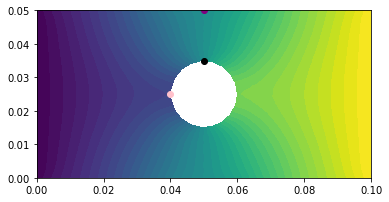

In [5]:
top_of_circle = np.array([5.0, 3.5])
side_of_circle = np.array([4.0, 2.5])
top_of_slab = np.array([5.0, 5.0])

fe.plot(fenics_results[30]['u'].sub(0))
ax = plt.gca()
ax.scatter(top_of_circle[0] / 100, top_of_circle[1] / 100, c='black')
ax.scatter(side_of_circle[0] / 100, side_of_circle[1] / 100, c='pink')
ax.scatter(top_of_slab[0] / 100, top_of_slab[1] / 100, c='purple')

In [6]:
print('Comparing top of circle:')
fenics_def = fenics_results[30]['deformation_at'](top_of_circle / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_results[30]['deformation_at'](top_of_circle)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_results[10]['deformation_at'](top_of_circle)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)

print('Comparing side of circle:')
fenics_def = fenics_results[30]['deformation_at'](side_of_circle / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_results[30]['deformation_at'](side_of_circle)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_results[10]['deformation_at'](side_of_circle)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)

print('Comparing top of slab:')
fenics_def = fenics_results[30]['deformation_at'](top_of_slab / 100) * 100
print('\tFENiCS deformation: ', fenics_def)
vfem_def = vfem_results[30]['deformation_at'](top_of_slab)
print('\tVarmint FEM deformation: ', vfem_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - vfem_def) / np.linalg.norm(fenics_def) * 100)
viga_def = viga_results[10]['deformation_at'](top_of_slab)
print('\tVarmint IGA deformation: ', viga_def, ' % error from FEnICS: ', np.linalg.norm(fenics_def - viga_def) / np.linalg.norm(fenics_def) * 100)


Comparing top of circle:
	FENiCS deformation:  [ 0.47217662 -0.133563  ]
	Varmint FEM deformation:  [ 0.49891849 -0.13261057]  % error from FEnICS:  5.453156127511599
	Varmint IGA deformation:  [ 0.49999999 -0.13824302]  % error from FEnICS:  5.749752367748959
Comparing side of circle:
	FENiCS deformation:  [0.19815114 0.00057059]
	Varmint FEM deformation:  [0.20623134 0.00079999]  % error from FEnICS:  4.079418267174586
	Varmint IGA deformation:  [1.99660268e-01 1.33986733e-09]  % error from FEnICS:  0.8142184315960699
Comparing top of slab:
	FENiCS deformation:  [ 0.499965   -0.19723613]
	Varmint FEM deformation:  [ 0.49985739 -0.19642893]  % error from FEnICS:  0.15151690145808247
	Varmint IGA deformation:  [ 0.49999998 -0.19791889]  % error from FEnICS:  0.1272002761334356


# Convergence test

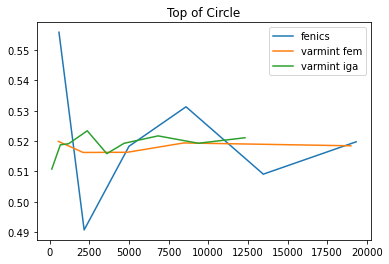

In [7]:
# Top of circle
p = top_of_circle

fenics_dofs = []
fenics_defs = []
for result in fenics_results.values():
    fenics_dofs.append(result['ndof'] * 2)
    fenics_defs.append(np.linalg.norm(result['deformation_at'](p / 100) * 100))

vfem_dofs = []
vfem_defs = []
for result in vfem_results.values():
    vfem_dofs.append(result['ndof'])
    vfem_defs.append(np.linalg.norm(result['deformation_at'](p)))

viga_dofs = []
viga_defs = []
for result in viga_results.values():
    viga_dofs.append(result['ndof'])
    viga_defs.append(np.linalg.norm(result['deformation_at'](p)))

plt.plot(fenics_dofs, fenics_defs, label='fenics')
plt.plot(vfem_dofs, vfem_defs, label='varmint fem')
plt.plot(viga_dofs, viga_defs, label='varmint iga')
plt.title('Top of Circle')

plt.legend()

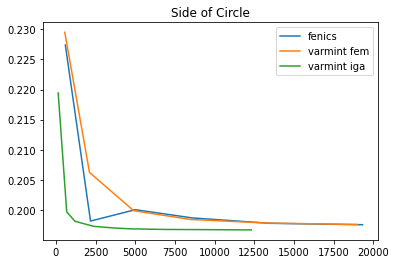

In [8]:
# Side of circle
p = side_of_circle

fenics_dofs = []
fenics_defs = []
for result in fenics_results.values():
    fenics_dofs.append(result['ndof'] * 2)
    fenics_defs.append(np.linalg.norm(result['deformation_at'](p / 100) * 100))

vfem_dofs = []
vfem_defs = []
for result in vfem_results.values():
    vfem_dofs.append(result['ndof'])
    vfem_defs.append(np.linalg.norm(result['deformation_at'](p)))

viga_dofs = []
viga_defs = []
for result in viga_results.values():
    viga_dofs.append(result['ndof'])
    viga_defs.append(np.linalg.norm(result['deformation_at'](p)))

plt.plot(fenics_dofs, fenics_defs, label='fenics')
plt.plot(vfem_dofs, vfem_defs, label='varmint fem')
plt.plot(viga_dofs, viga_defs, label='varmint iga')
plt.title('Side of Circle')

plt.legend()

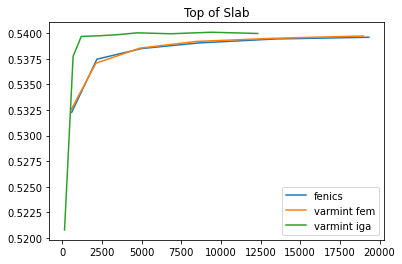

In [9]:
# Top of slab
p = top_of_slab

fenics_dofs = []
fenics_defs = []
for result in fenics_results.values():
    fenics_dofs.append(result['ndof'] * 2)
    fenics_defs.append(np.linalg.norm(result['deformation_at'](p / 100) * 100))

vfem_dofs = []
vfem_defs = []
for result in vfem_results.values():
    vfem_dofs.append(result['ndof'])
    vfem_defs.append(np.linalg.norm(result['deformation_at'](p)))

viga_dofs = []
viga_defs = []
for result in viga_results.values():
    viga_dofs.append(result['ndof'])
    viga_defs.append(np.linalg.norm(result['deformation_at'](p)))

plt.plot(fenics_dofs, fenics_defs, label='fenics')
plt.plot(vfem_dofs, vfem_defs, label='varmint fem')
plt.plot(viga_dofs, viga_defs, label='varmint iga')
plt.title('Top of Slab')

plt.legend()